https://www.kaggle.com/datasets/raminhuseyn/airline-customer-satisfaction

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
data = pd.read_csv(filepath_or_buffer="Airline_customer_satisfaction.csv", sep=',')
data.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [48]:
description = {
    "Column Name": [
        "Satisfaction",
        "Customer Type",
        "Age",
        "Type of Travel",
        "Class",
        "Flight Distance",
        "Seat comfort",
        "Departure/Arrival time convenient",
        "Food and drink",
        "Gate location",
        "Inflight wifi service",
        "Inflight entertainment",
        "Online support",
        "Ease of online booking",
        "On-board service",
        "Leg room service",
        "Baggage handling",
        "Checkin service",
        "Cleanliness",
        "Online boarding",
        "Depart Delay in Minutes",
        "Arrival Delay in Minutes",
    ],
    "Description": [
        "Indicates the satisfaction level of the customer.",
        "Type of customer: 'Loyal Customer' or 'Disloyal Customer'.",
        "Age of the customer.",
        "Purpose of the travel: 'Business travel' or 'Personal Travel'.",
        "Class of travel: 'Business', 'Eco', or 'Eco Plus'.",
        "The distance of the flight in kilometres",
        "Rating of seat comfort provided during the flight (1 to 5).",
        "Rating of the convenience of departure/arrival time (1 to 5).",
        "Rating of food and drink quality provided during the flight (1 to 5).",
        "Rating of gate location convenience (1 to 5).",
        "Rating of inflight wifi service satisfaction (1 to 5).",
        "Rating of inflight entertainment satisfaction (1 to 5).",
        "Rating of online customer support satisfaction (1 to 5).",
        "Rating of ease of online booking satisfaction (1 to 5).",
        "Rating of on-board service satisfaction (1 to 5).",
        "Rating of leg room service satisfaction (1 to 5).",
        "Rating of baggage handling satisfaction (1 to 5).",
        "Rating of check-in service satisfaction (1 to 5).",
        "Rating of cleanliness satisfaction (1 to 5).",
        "Rating of online boarding satisfaction (1 to 5).",
        "Total departure delay in minutes.",
        "Total arrival delay in minutes."
    ],
}


desc = pd.DataFrame(description)
desc

,Column Name,Description
0,Satisfaction,Indicates the satisfaction level of the customer.
1,Customer Type,Type of customer: 'Loyal Customer' or 'Disloya...
2,Age,Age of the customer.
3,Type of Travel,Purpose of the travel: 'Business travel' or 'P...
4,Class,"Class of travel: 'Business', 'Eco', or 'Eco Pl..."
5,Flight Distance,The distance of the flight in kilometres
6,Seat comfort,Rating of seat comfort provided during the fli...
7,Departure/Arrival time convenient,Rating of the convenience of departure/arrival...
8,Food and drink,Rating of food and drink quality provided duri...
9,Gate location,Rating of gate location convenience (1 to 5).


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

In [50]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
Flight Distance,129880.0,1981.409055,1027.115606,50.0,1359.0,1925.0,2544.0,6951.0
Seat comfort,129880.0,2.838597,1.392983,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129880.0,2.990645,1.527224,0.0,2.0,3.0,4.0,5.0
Food and drink,129880.0,2.851994,1.443729,0.0,2.0,3.0,4.0,5.0
Gate location,129880.0,2.990422,1.305970,0.0,2.0,3.0,4.0,5.0
Inflight wifi service,129880.0,3.249130,1.318818,0.0,2.0,3.0,4.0,5.0
Inflight entertainment,129880.0,3.383477,1.346059,0.0,2.0,4.0,4.0,5.0
Online support,129880.0,3.519703,1.306511,0.0,3.0,4.0,5.0,5.0
Ease of Online booking,129880.0,3.472105,1.305560,0.0,2.0,4.0,5.0,5.0


# 1. EDA

In [51]:
data.isnull().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [52]:
data.duplicated().sum()

np.int64(0)

> There are 393 missing values in "Arrival delay in Minutes" column. Since the missing is small, we just drop the null values

> There is no duplicated values

In [53]:
data2 = data.dropna()
data2.isna().sum()

satisfaction                         0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

## 1.2 Visualization

In [54]:
data2.corr(numeric_only=True).style.background_gradient()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,-0.249438,0.008475,0.038905,0.015496,-0.000805,0.014037,0.130254,0.121287,0.071728,0.066510,0.083684,-0.015554,0.031556,-0.018605,0.037948,-0.009263,-0.011248
Flight Distance,-0.249438,1.000000,-0.042476,0.001381,-0.004806,-0.002322,0.012314,-0.027344,-0.031860,-0.022326,-0.032422,-0.030220,0.019653,0.002531,0.009391,0.009674,0.111608,0.110103
Seat comfort,0.008475,-0.042476,1.000000,0.434945,0.716008,0.405358,0.129152,0.426488,0.120153,0.211576,0.121183,0.136161,0.118557,0.041265,0.108681,0.130365,-0.023842,-0.025506
Departure/Arrival time convenient,0.038905,0.001381,0.434945,1.000000,0.527575,0.544311,-0.001558,0.077262,-0.000470,0.001853,0.060104,0.029416,0.067201,0.062927,0.067021,-0.000495,0.004197,0.002599
Food and drink,0.015496,-0.004806,0.716008,0.527575,1.000000,0.523530,0.026077,0.367777,0.028503,0.041150,0.038578,0.073975,0.036307,0.011912,0.033313,0.013620,-0.013375,-0.014881
Gate location,-0.000805,-0.002322,0.405358,0.544311,0.523530,1.000000,-0.003949,-0.000430,0.002679,0.001365,-0.025346,-0.007462,-0.000345,-0.031809,-0.001789,-0.003141,0.003997,0.003640
Inflight wifi service,0.014037,0.012314,0.129152,-0.001558,0.026077,-0.003949,1.000000,0.253941,0.557548,0.601074,0.060854,0.033636,0.038339,0.092402,0.038513,0.631800,-0.033010,-0.035270
Inflight entertainment,0.130254,-0.027344,0.426488,0.077262,0.367777,-0.000430,0.253941,1.000000,0.441844,0.321891,0.184083,0.160616,0.117286,0.224130,0.109420,0.355692,-0.030325,-0.033321
Online support,0.121287,-0.031860,0.120153,-0.000470,0.028503,0.002679,0.557548,0.441844,1.000000,0.617642,0.158006,0.138258,0.102399,0.206641,0.095773,0.669886,-0.033694,-0.036087
Ease of Online booking,0.071728,-0.022326,0.211576,0.001853,0.041150,0.001365,0.601074,0.321891,0.617642,1.000000,0.436439,0.355274,0.398457,0.137896,0.418073,0.684329,-0.036647,-0.039806


> Lets look at the distribution of continue numerical column


In [55]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
Flight Distance,129880.0,1981.409055,1027.115606,50.0,1359.0,1925.0,2544.0,6951.0
Seat comfort,129880.0,2.838597,1.392983,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129880.0,2.990645,1.527224,0.0,2.0,3.0,4.0,5.0
Food and drink,129880.0,2.851994,1.443729,0.0,2.0,3.0,4.0,5.0
Gate location,129880.0,2.990422,1.305970,0.0,2.0,3.0,4.0,5.0
Inflight wifi service,129880.0,3.249130,1.318818,0.0,2.0,3.0,4.0,5.0
Inflight entertainment,129880.0,3.383477,1.346059,0.0,2.0,4.0,4.0,5.0
Online support,129880.0,3.519703,1.306511,0.0,3.0,4.0,5.0,5.0
Ease of Online booking,129880.0,3.472105,1.305560,0.0,2.0,4.0,5.0,5.0


In [56]:
data2.columns

Index(['satisfaction', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [57]:
continue_num_df = data2[
    [
        "Seat comfort",
        "Departure/Arrival time convenient",
        "Food and drink",
        "Gate location",
        "Inflight wifi service",
        "Inflight entertainment",
        "Online support",
        "Ease of Online booking",
        "On-board service",
        "Leg room service",
        "Baggage handling",
        "Checkin service",
        "Cleanliness",
        "Online boarding",
    ]
]



> say if there are any column which influence "satisfaction" column ?

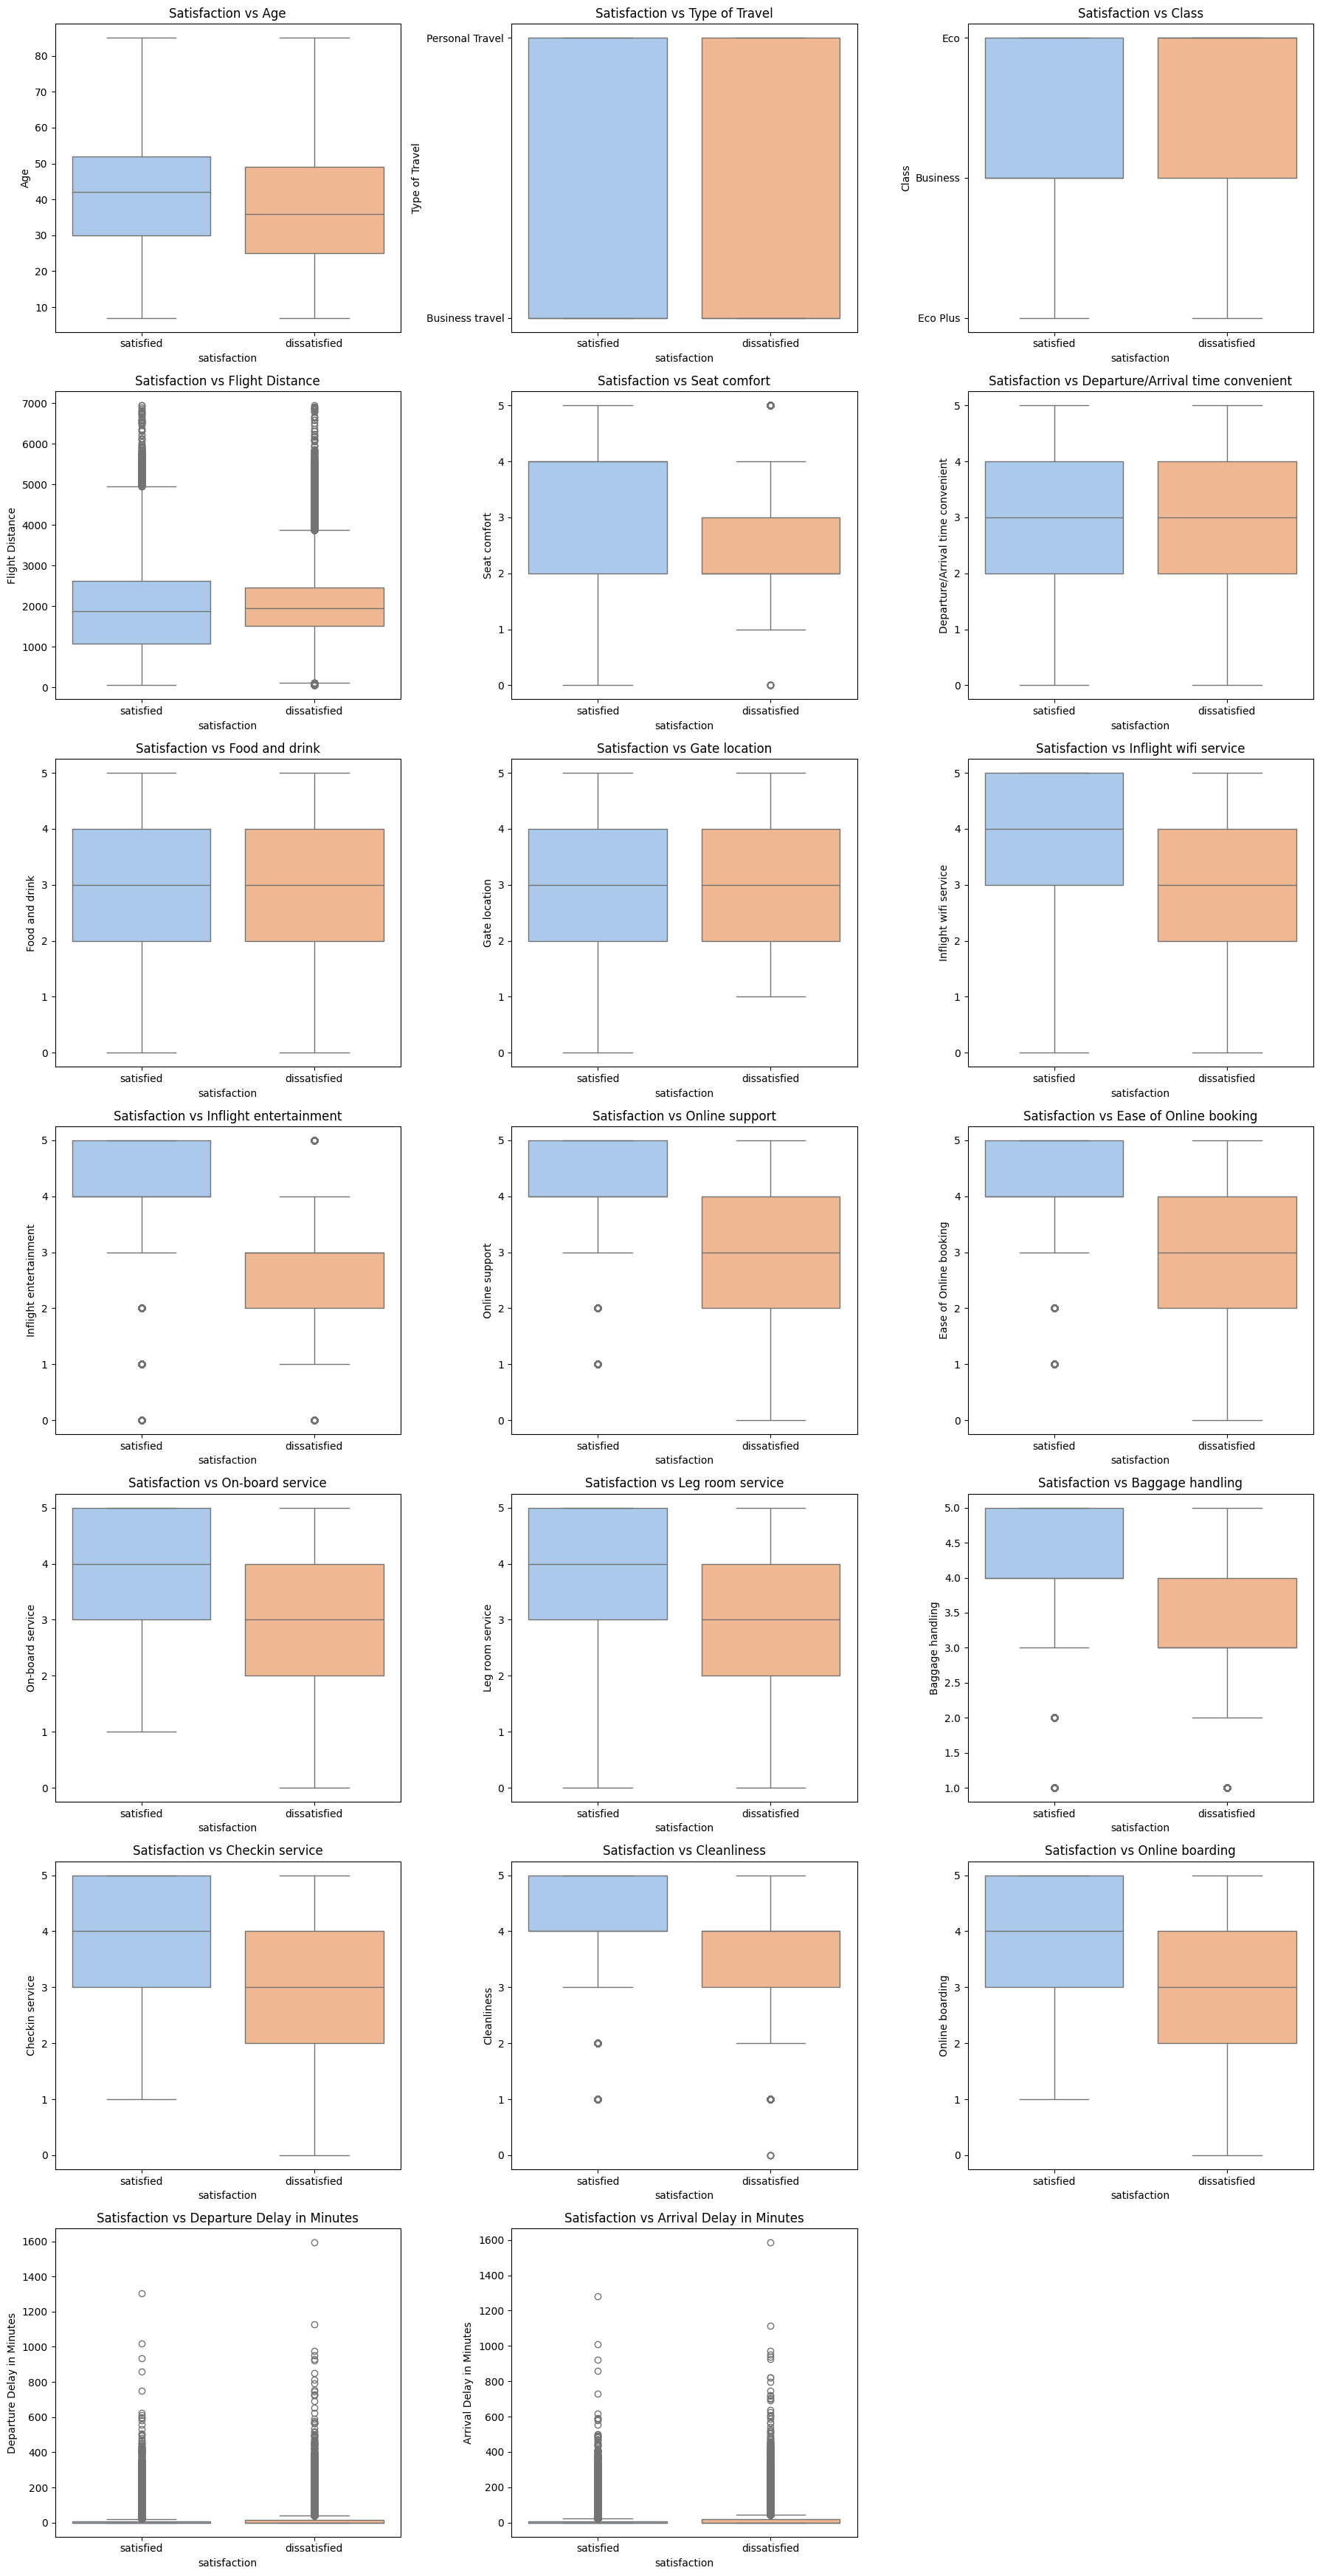

In [58]:
fig, ax = plt.subplots(7, 3, figsize = (18,35))   
cols = []
for ind, col in enumerate(data2.drop(["satisfaction", "Customer Type"], axis=1).columns):
    cols.append(col)

a = 0
for i in range(7):
    for j in range(3):    
        if a < len(cols):
            ax[i][j] = sns.boxplot(data=data2, x="satisfaction", y = cols[a], ax=ax[i][j], hue="satisfaction",palette="pastel", )
            ax[i][j].set_title(f"Satisfaction vs {cols[a]}")
            a += 1
        else:
            ax[i][j].axis('off')   


# plt.legend()
plt.tight_layout()
plt.show()             

> Look like there are some columns are not really useful for our classification model

> Drop "Type of Travel", "Class",  "Departure/Arrival time convenient", "Food and Drink", "Gate location"

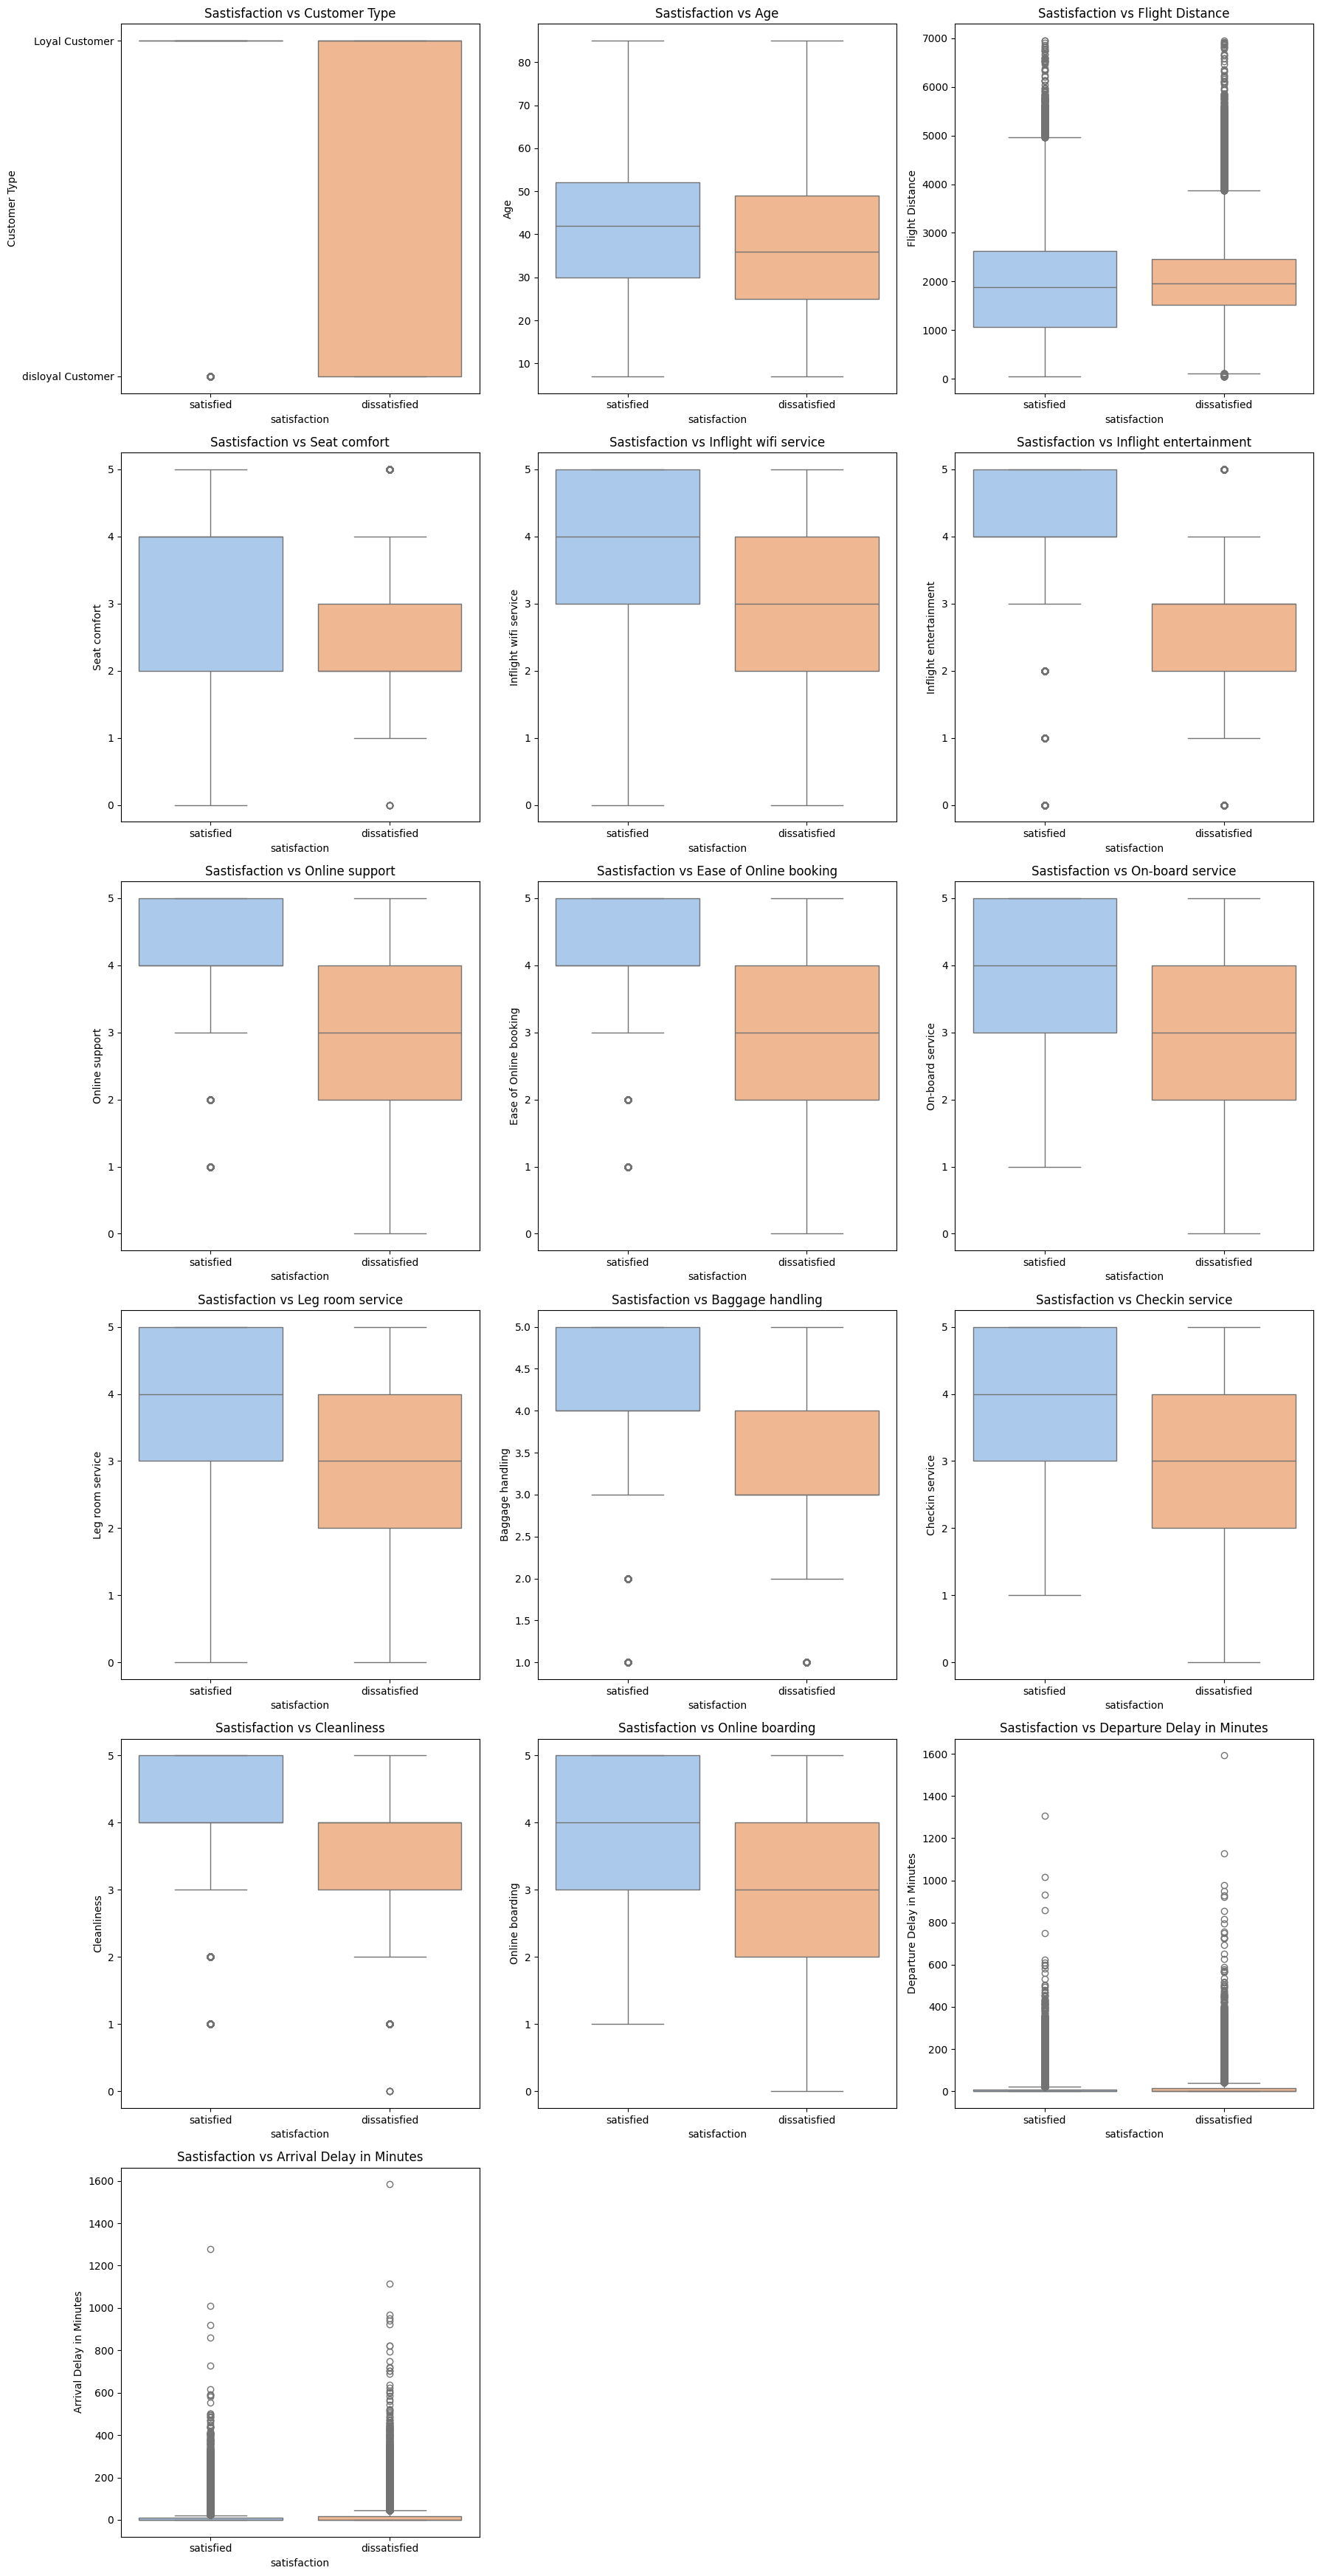

In [59]:
data3 = data2.drop(["Type of Travel", "Class",  "Departure/Arrival time convenient", "Food and drink", "Gate location"] , axis=1)
import math

cols = [col for col in data3.drop('satisfaction',axis=1).columns]
fig, ax = plt.subplots(math.ceil(len(cols)/3),3, figsize=(18,35))
a = 0
for i in range(math.ceil(len(cols)/3)):
    for j in range(3):
        if a < len(cols):
            ax[i][j] = sns.boxplot(data=data3, x="satisfaction", y=cols[a], ax=ax[i][j], hue="satisfaction", palette="pastel")
            ax[i][j].set_title(f"Sastisfaction vs {cols[a]}")
            a += 1
        else:
            ax[i][j].axis('off')
plt.tight_layout()    
plt.show()

> Lets take a look at "Customer Type" , "Age", "Flight Distance", "Departure Delay in Minute", "Arrival Delay in Minute"

Text(0.5, 1.0, 'Age vs satisfaction')

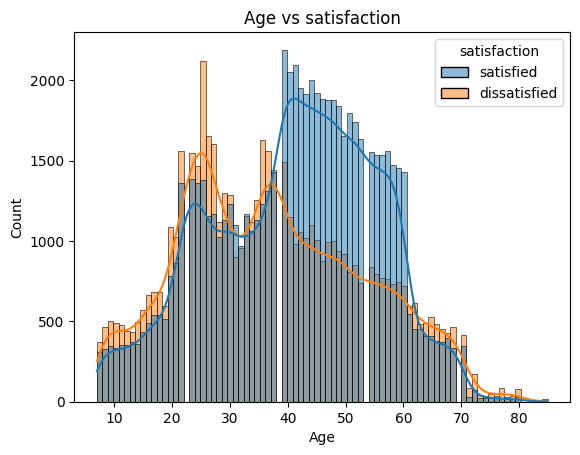

In [60]:
sns.histplot(data=data3, x="Age", hue="satisfaction", kde=True).set_title("Age vs satisfaction")

> This graph illustrates that age does not influence satisfaction of Customer. You might notice the blue graph rise higher at age 40-70, but it just displays the total number of people at specific age who rated on satisfaction. Look at the pattern, it follows the path, we will drop it.

In [61]:
data3['Flight Distance'].quantile([0.25, 0.5, 0.75])

0.25    1359.0
0.50    1924.0
0.75    2543.0
Name: Flight Distance, dtype: float64

> The "Age" column  has not got outlier and seen to affect much on constomer satisfaction. We will drop it.

Text(0.5, 1.0, 'satisfaction vs flight distance')

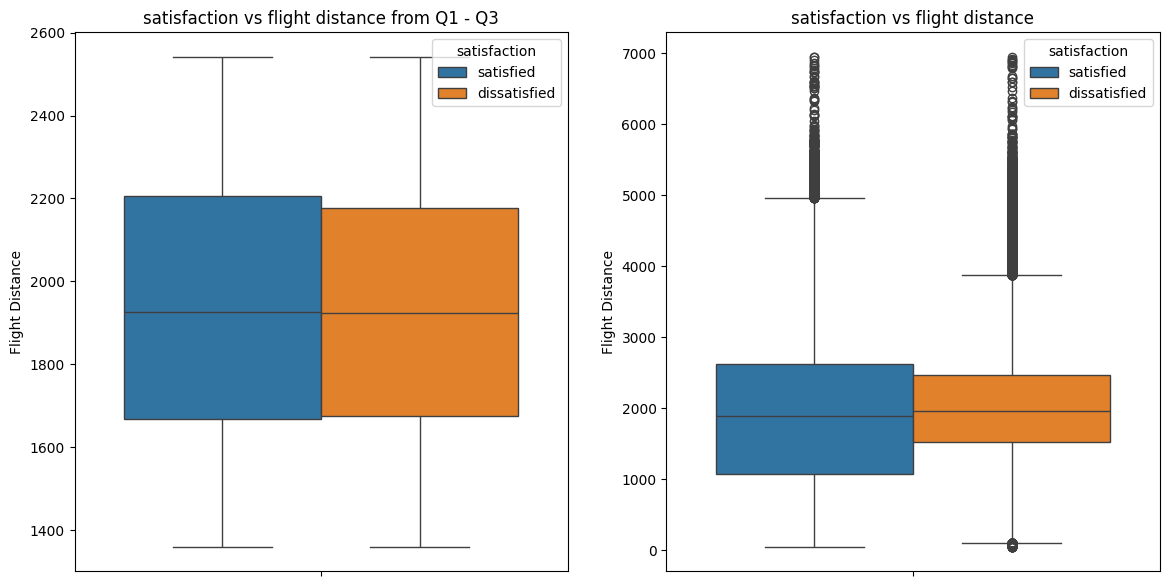

In [62]:
fig, ax = plt.subplots(1,2, figsize=(14,7))
sns.boxplot(data=data3[(data3["Flight Distance"] < data3['Flight Distance'].quantile(0.75)) & (data3["Flight Distance"] > data3['Flight Distance'].quantile(0.25))],\
             y="Flight Distance",\
                  hue="satisfaction", 
                  ax=ax[0],)
ax[0].set_title("satisfaction vs flight distance from Q1 - Q3")                  
sns.boxplot(data=data3, y="Flight Distance", hue="satisfaction", ax=ax[1])
ax[1].set_title("satisfaction vs flight distance")

> There are some sort of outlier here in Flight Distance column, 
it looks like some short Distance also unsatisfy with our service, which mean Satifaction does not depend on Flight Distance.
We will drop it as well, 

In [63]:
print(data3["Departure Delay in Minutes"].describe())
print("\n")
print(data3["Arrival Delay in Minutes"].describe())

count    129487.000000
mean         14.643385
std          37.932867
min           0.000000
25%           0.000000
50%           0.000000
75%          12.000000
max        1592.000000
Name: Departure Delay in Minutes, dtype: float64


count    129487.000000
mean         15.091129
std          38.465650
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64


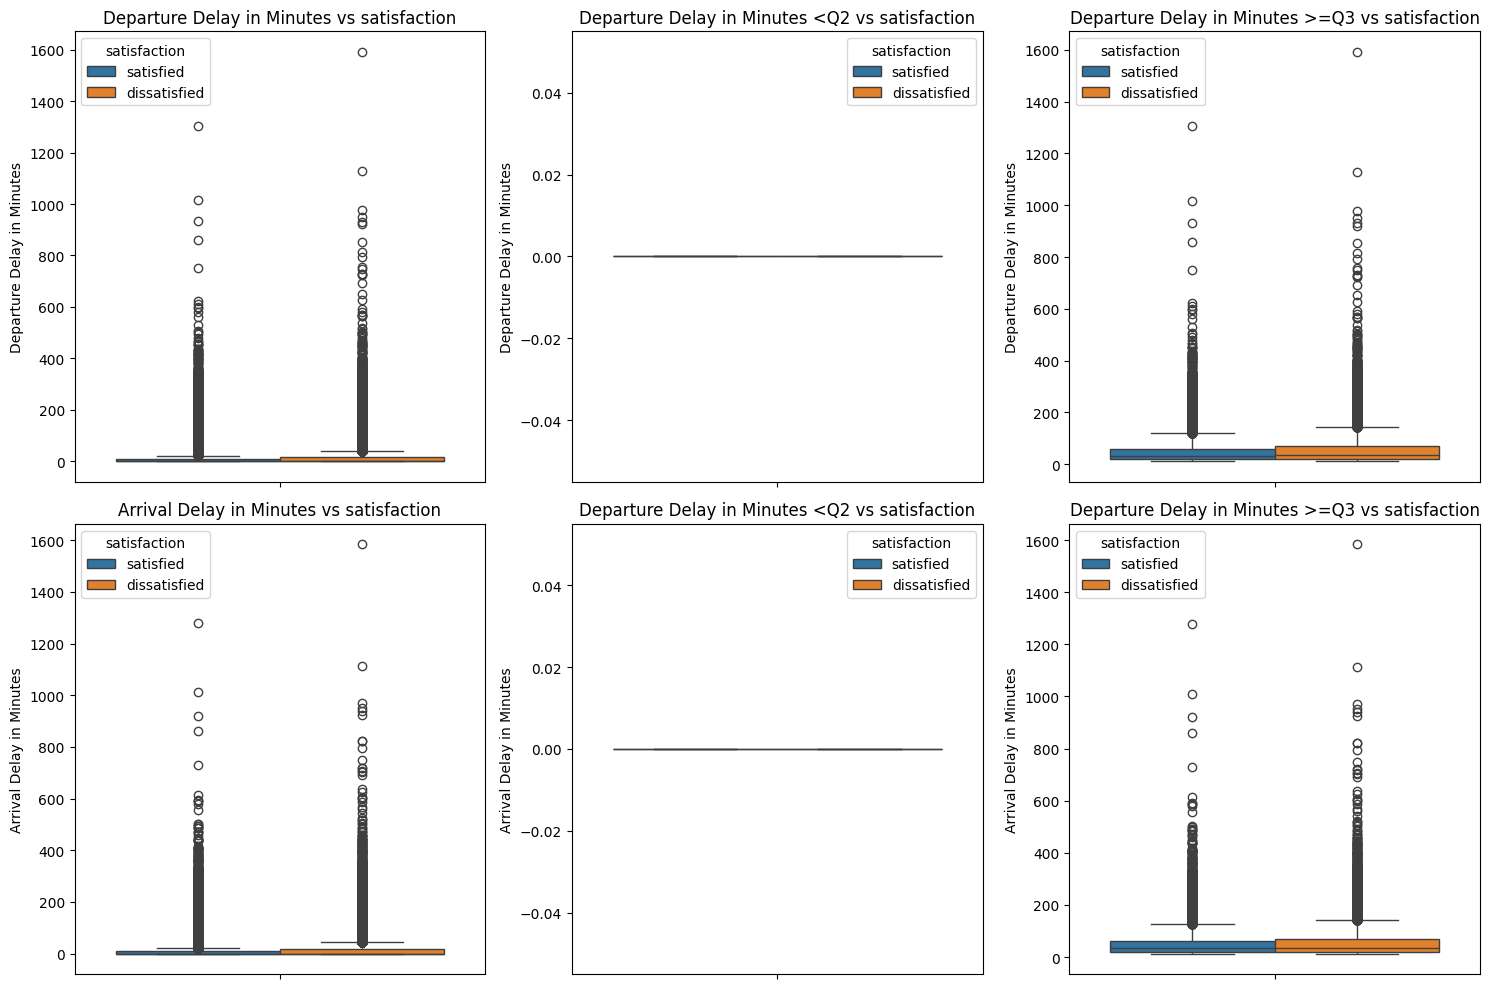

In [64]:
fig, ax = plt.subplots(2,3, figsize=(15,10))

sns.boxplot(data=data3, 
            y="Departure Delay in Minutes", 
            hue="satisfaction", 
            ax=ax[0][0]).set_title("Departure Delay in Minutes vs satisfaction")

sns.boxplot(data=data3[data3["Departure Delay in Minutes"] <= data3["Departure Delay in Minutes"].quantile(0.5)],
            y="Departure Delay in Minutes",
            hue="satisfaction", 
            ax=ax[0][1],).set_title("Departure Delay in Minutes <Q2 vs satisfaction")

sns.boxplot(data=data3[data3["Departure Delay in Minutes"] >= data3["Departure Delay in Minutes"].quantile(0.75)],
            y="Departure Delay in Minutes",
            hue="satisfaction", 
            ax=ax[0][2],).set_title("Departure Delay in Minutes >=Q3 vs satisfaction")



sns.boxplot(data=data3, 
            y="Arrival Delay in Minutes", 
            hue="satisfaction", ax=ax[1][0]).set_title("Arrival Delay in Minutes vs satisfaction")

sns.boxplot(data=data3[data3["Arrival Delay in Minutes"] <= data3["Arrival Delay in Minutes"].quantile(0.5)],
            y="Arrival Delay in Minutes",\
            hue="satisfaction", 
            ax=ax[1][1],).set_title("Departure Delay in Minutes <Q2 vs satisfaction")

sns.boxplot(data=data3[data3["Arrival Delay in Minutes"] >= data3["Arrival Delay in Minutes"].quantile(0.75)],
            y="Arrival Delay in Minutes",\
            hue="satisfaction", 
            ax=ax[1][2],).set_title("Departure Delay in Minutes >=Q3 vs satisfaction")


plt.tight_layout()

> it looks like both long and short delay arrival and departure are satisfied and unsatisfied with the same nearly the same equal amount of rate,
so these two columns do not have relationship with satisfaction as well. we will drop it.

<Axes: xlabel='Customer Type', ylabel='count'>

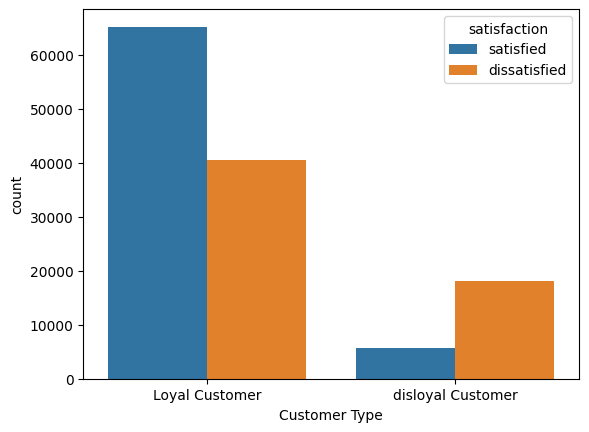

In [65]:
# fig, ax = plt.subplots(1,2, figsize=(14,7))
sns.countplot(data=data3, x="Customer Type", hue="satisfaction")

> It is sort of logic that Loyal customer would likely no matter what will just rate satisfied to the service, 
so if we can classify satisfied customer, we would be able to assume that they are a loyal customer, vice versa. 
we will drop this columns.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12552\2676708095.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


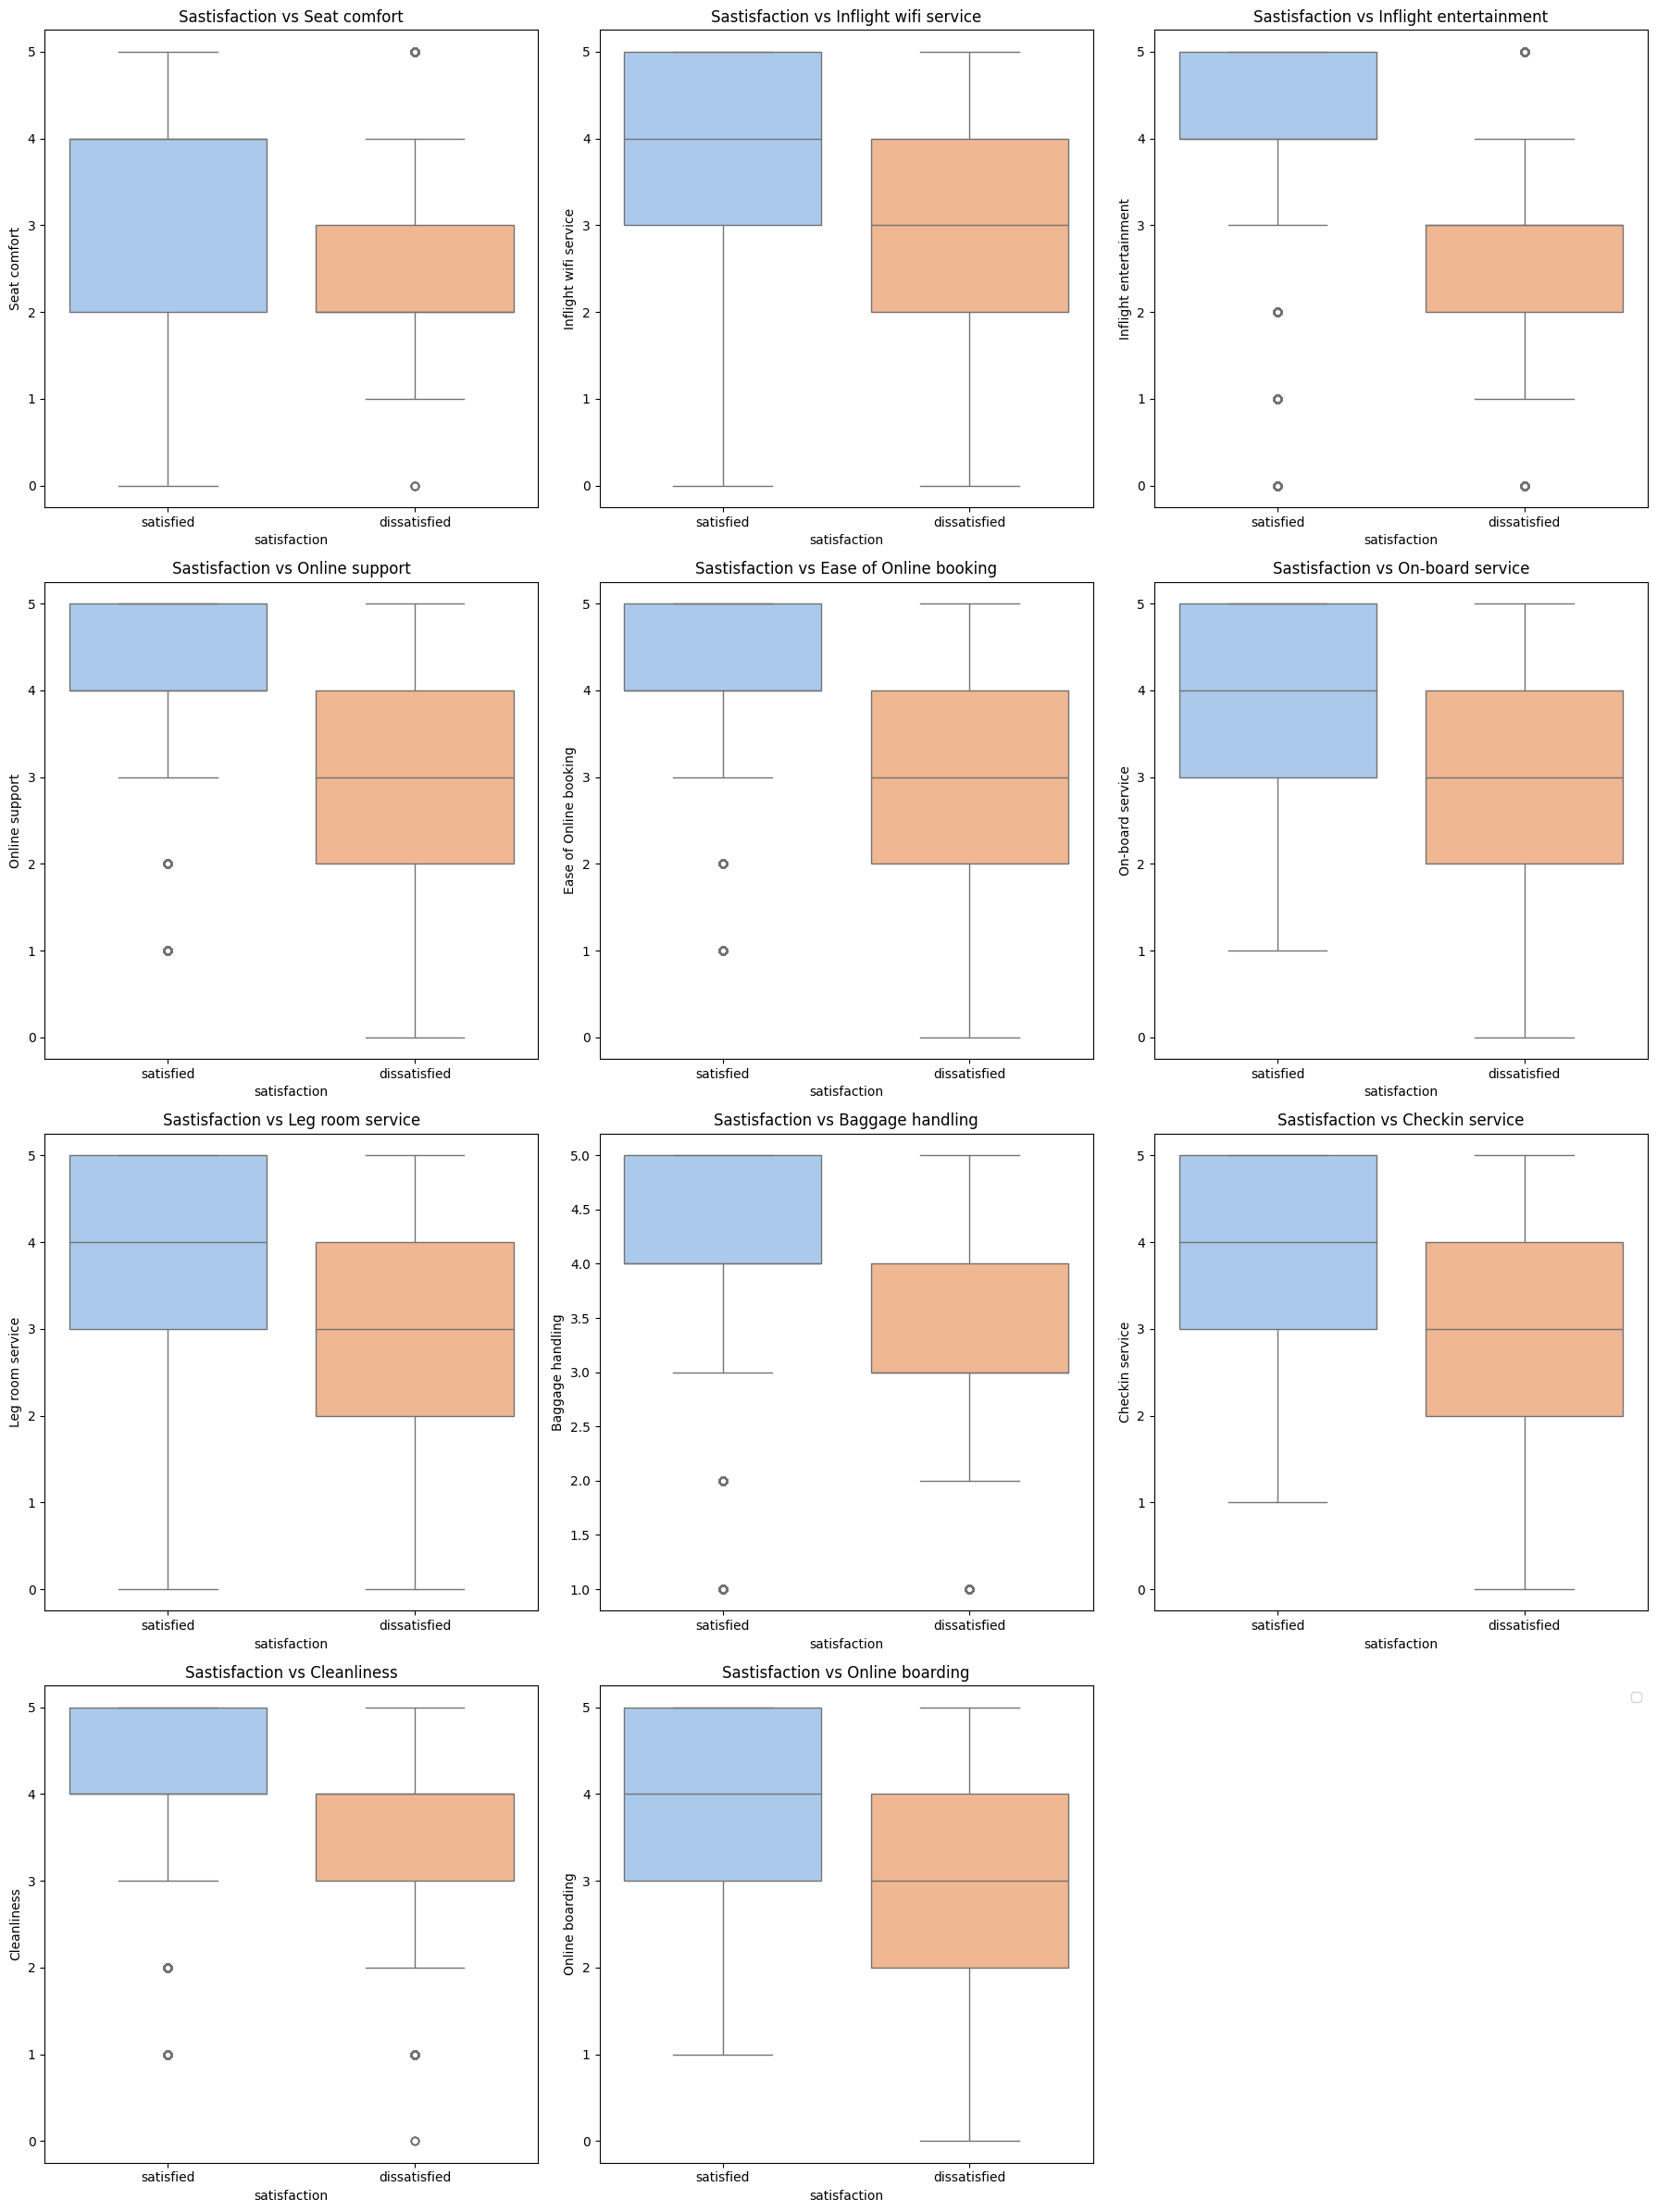

In [66]:
data4 = data3.drop(["Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes", "Customer Type"], axis=1)

import math

cols = data4.drop( ["satisfaction"], axis=1).columns
fig, ax = plt.subplots(math.ceil(len(cols)/3),3, figsize=(18,24))
a = 0
for i in range(math.ceil(len(cols)/3)):
    for j in range(3):
        if a < len(cols):
            ax[i][j] = sns.boxplot(data=data4, x="satisfaction", y=cols[a], ax=ax[i][j], hue="satisfaction", palette="pastel")
            ax[i][j].set_title(f"Sastisfaction vs {cols[a]}")
            a += 1
        else:
            ax[i][j].axis('off')
plt.tight_layout()    
plt.legend()
plt.show()

# 2. Data Preprocessing

> These outlier follows the pattern , when the box goes up, the outlier tends to move a according to the box, 

> So we will level off by min and max respects to bottom and top outlier.


In [67]:
data4.head()

,satisfaction,Seat comfort,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
0,satisfied,0,2,4,2,3,3,0,3,5,3,2
1,satisfied,0,0,2,2,3,4,4,4,2,3,2
2,satisfied,0,2,0,2,2,3,3,4,4,4,2
3,satisfied,0,3,4,3,1,1,0,1,4,1,3
4,satisfied,0,4,3,4,2,2,0,2,4,2,5


* **Seat comfort**

Text(0.5, 1.0, 'Histogram of Seat comfort')

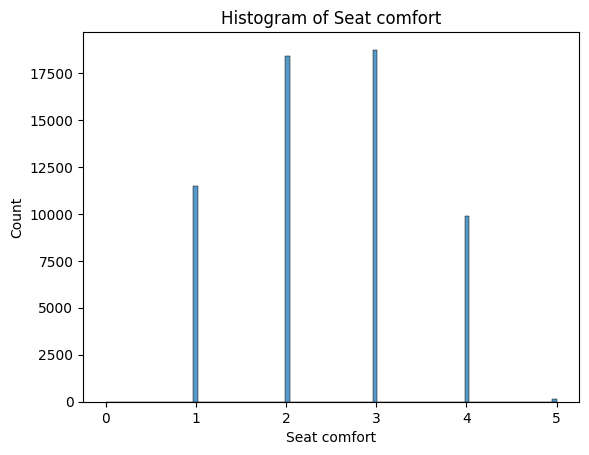

In [68]:
# Seat comfort
sns.histplot(
    data=data4.loc[data4["satisfaction"] == "dissatisfied", "Seat comfort"]
).set_title("Histogram of Seat comfort")

Text(0.5, 1.0, 'Histogram of Seat comfort')

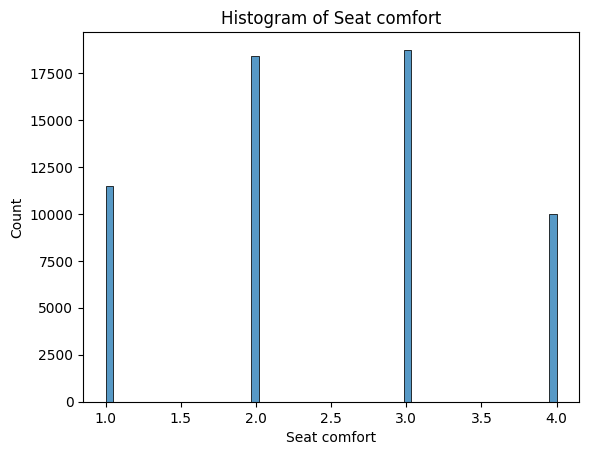

In [69]:
# we will take anything greater than 4, is 4, and less than 1 is one

data4.loc[(data4["Seat comfort"] <= 1), "Seat comfort"] = 1
data4.loc[(data4["Seat comfort"] >= 4), "Seat comfort"] = 4
sns.histplot(
    data=data4.loc[data4["satisfaction"] == "dissatisfied", "Seat comfort"]
).set_title("Histogram of Seat comfort")

* **Inflight entertainment**

Text(0.5, 1.0, 'Histogram of Inflight entertainment')

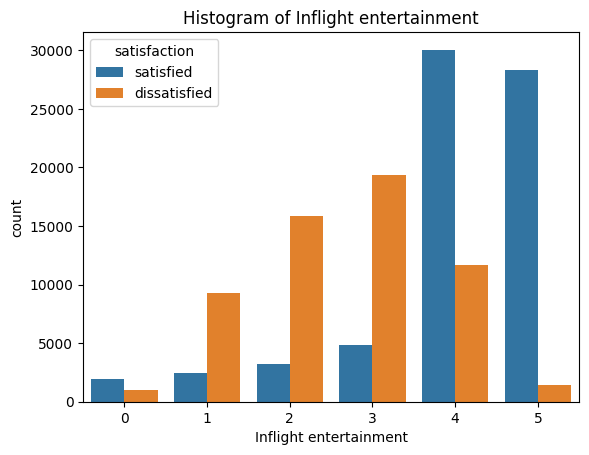

In [70]:
# Inflight entertainment
sns.countplot(data=data4, x="Inflight entertainment", hue="satisfaction").set_title(
    "Histogram of Inflight entertainment"
)

Text(0.5, 1.0, 'Histogram of Inflight entertainment')

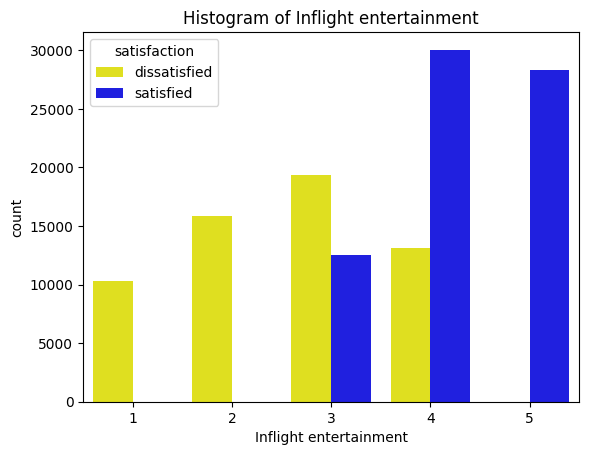

In [71]:
# # data4[["satisfaction", "Inflight entertainment"]]
# data4.loc[(data4['satisfaction'] =="satisfied"), "Inflight entertainment"].apply(lambda x, 3 if x <=3)
# data4.loc[(data4['satisfaction'] =="dissatisfied"), "Inflight entertainment"].apply(lambda x, 1 if x <=1 elif x>=4 4)


data4["Inflight entertainment"] = data4.apply(
    lambda x: (
        3
        if (x["satisfaction"] == "satisfied") and x["Inflight entertainment"] <= 3
        else (
            1
            if (x["satisfaction"] == "dissatisfied")
            and x["Inflight entertainment"] <= 1
            else (
                4
                if (x["satisfaction"] == "dissatisfied")
                and x["Inflight entertainment"] >= 4
                else x["Inflight entertainment"]
            )
        )
    ),
    axis=1,
)

sns.countplot(
    data=data4,
    x="Inflight entertainment",
    hue="satisfaction",
    palette={"satisfied": "blue", "dissatisfied": "yellow"},
).set_title("Histogram of Inflight entertainment")

* **Online support**

Text(0.5, 1.0, 'Histogram of Online support')

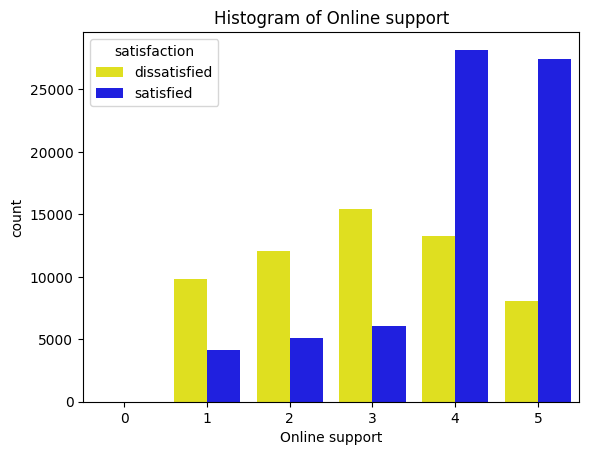

In [72]:
# Online support
sns.countplot(
    data=data4,
    x="Online support",
    hue="satisfaction",
    palette={"satisfied": "blue", "dissatisfied": "yellow"},
).set_title("Histogram of Online support")

Text(0.5, 1.0, 'Histogram of Online support')

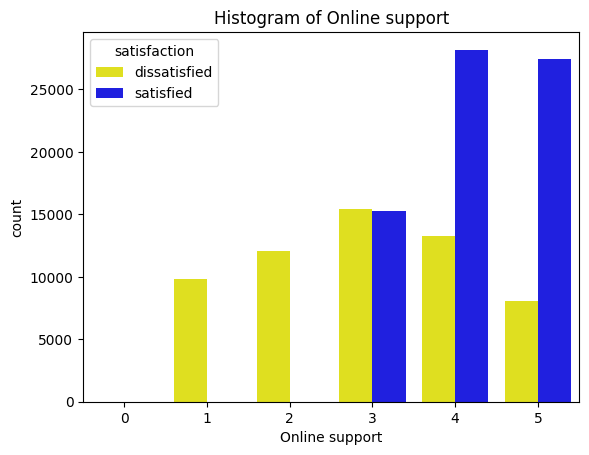

In [73]:
data4["Online support"] = data4.apply(
    lambda x: (
        3
        if x["satisfaction"] == "satisfied" and x["Online support"] <= 3
        else x["Online support"]
    ),
    axis=1,
)

sns.countplot(
    data=data4,
    x="Online support",
    hue="satisfaction",
    palette={"satisfied": "blue", "dissatisfied": "yellow"},
).set_title("Histogram of Online support")

* **Ease of Online booking**

Text(0.5, 1.0, 'Histogram of Ease of Online booking')

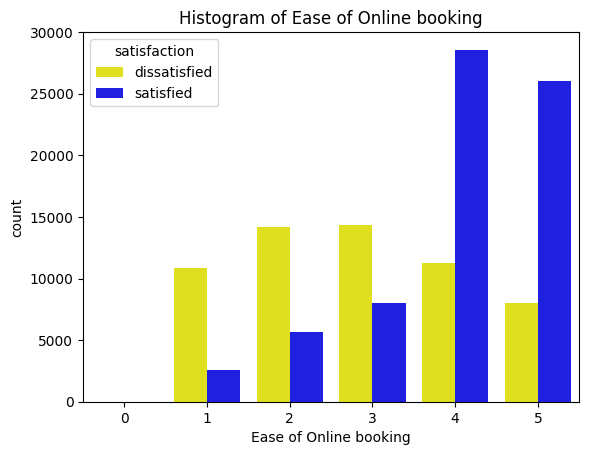

In [74]:
# Ease of Online booking
sns.countplot(
    data=data4,
    x="Ease of Online booking",
    hue="satisfaction",
    palette={"satisfied": "blue", "dissatisfied": "yellow"},
).set_title("Histogram of Ease of Online booking")

Text(0.5, 1.0, 'Histogram of Ease of Online booking')

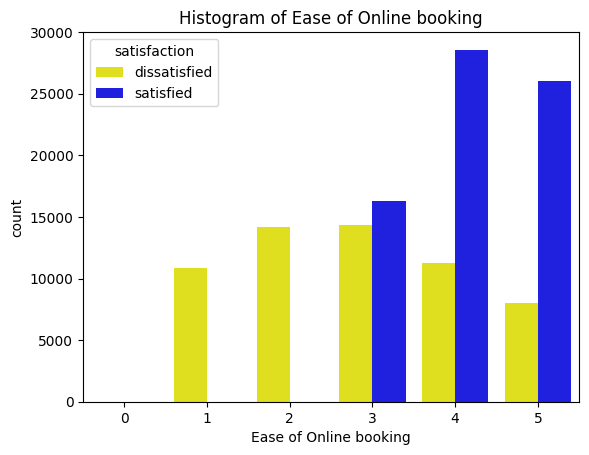

In [75]:
data4["Ease of Online booking"] = data4.apply(
    lambda x: (
        3
        if x["satisfaction"] == "satisfied" and x["Ease of Online booking"] <= 3
        else x["Ease of Online booking"]
    ),
    axis=1,
)

sns.countplot(
    data=data4,
    x="Ease of Online booking",
    hue="satisfaction",
    palette={"satisfied": "blue", "dissatisfied": "yellow"},
).set_title("Histogram of Ease of Online booking")

* **Baggage handling**

Text(0.5, 1.0, 'Histogram of Baggage handling')

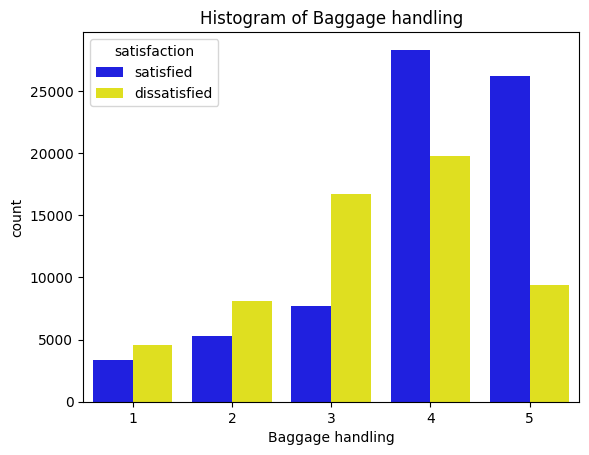

In [76]:
# Baggage handling
sns.countplot(
    data=data4,
    x="Baggage handling",
    hue="satisfaction",
    palette={"satisfied": "blue", "dissatisfied": "yellow"},
).set_title("Histogram of Baggage handling")

Text(0.5, 1.0, 'Histogram of Baggage handling')

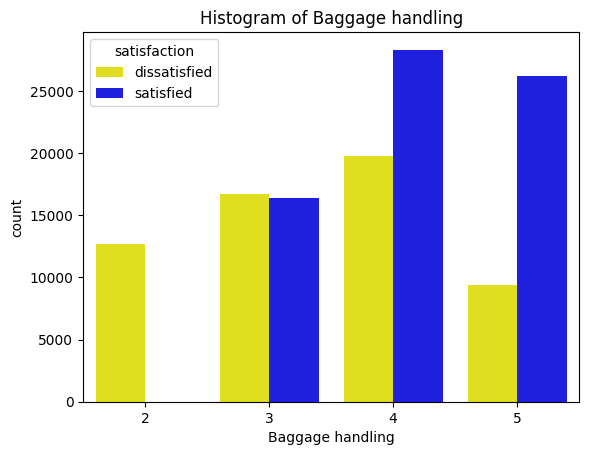

In [77]:
data4.loc[
    (data4["satisfaction"] == "satisfied") & (data4["Baggage handling"] <= 3),
    "Baggage handling",
] = 3

data4.loc[
    (data4["satisfaction"] == "dissatisfied") & (data4["Baggage handling"] <= 2),
    "Baggage handling",
] = 2

sns.countplot(
    data=data4,
    x="Baggage handling",
    hue="satisfaction",
    palette={"satisfied": "blue", "dissatisfied": "yellow"},
).set_title("Histogram of Baggage handling")

* **Cleanliness**

Text(0.5, 1.0, 'Histogram of Cleanliness')

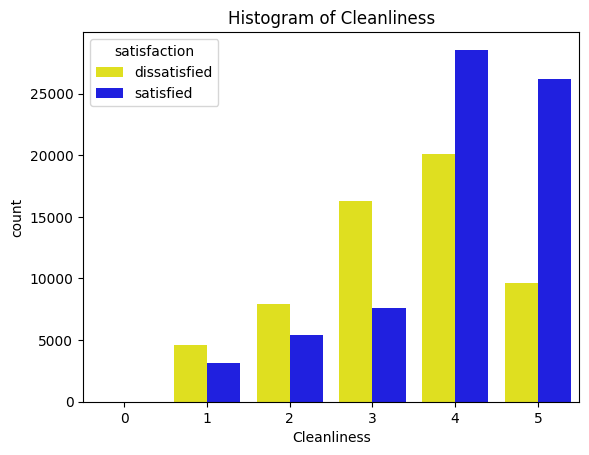

In [78]:
# Cleanliness
sns.countplot(
    data=data4,
    x="Cleanliness",
    hue="satisfaction",
    palette={"satisfied": "blue", "dissatisfied": "yellow"},
).set_title("Histogram of Cleanliness")

Text(0.5, 1.0, 'Histogram of Cleanliness')

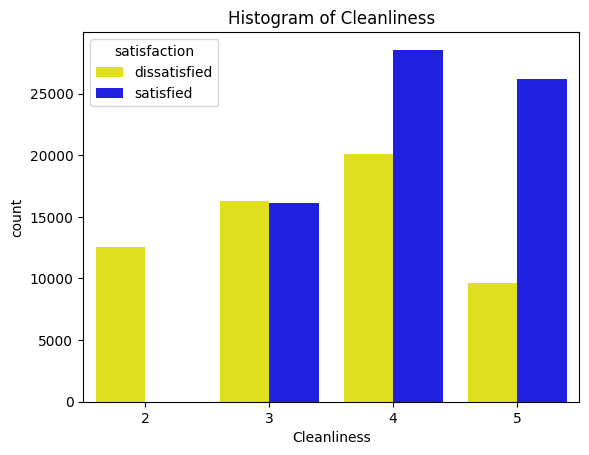

In [79]:
data4.loc[(data4["satisfaction"]=="satisfied") & (data4["Cleanliness"] <= 3) , "Cleanliness"] = 3
data4.loc[(data4["satisfaction"]=="dissatisfied") & (data4["Cleanliness"] <= 2) , "Cleanliness"] = 2

sns.countplot(
    data=data4,
    x="Cleanliness",
    hue="satisfaction",
    palette={"satisfied": "blue", "dissatisfied": "yellow"},
).set_title("Histogram of Cleanliness")

### Check the data again if they are cleaned

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12552\1289423550.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


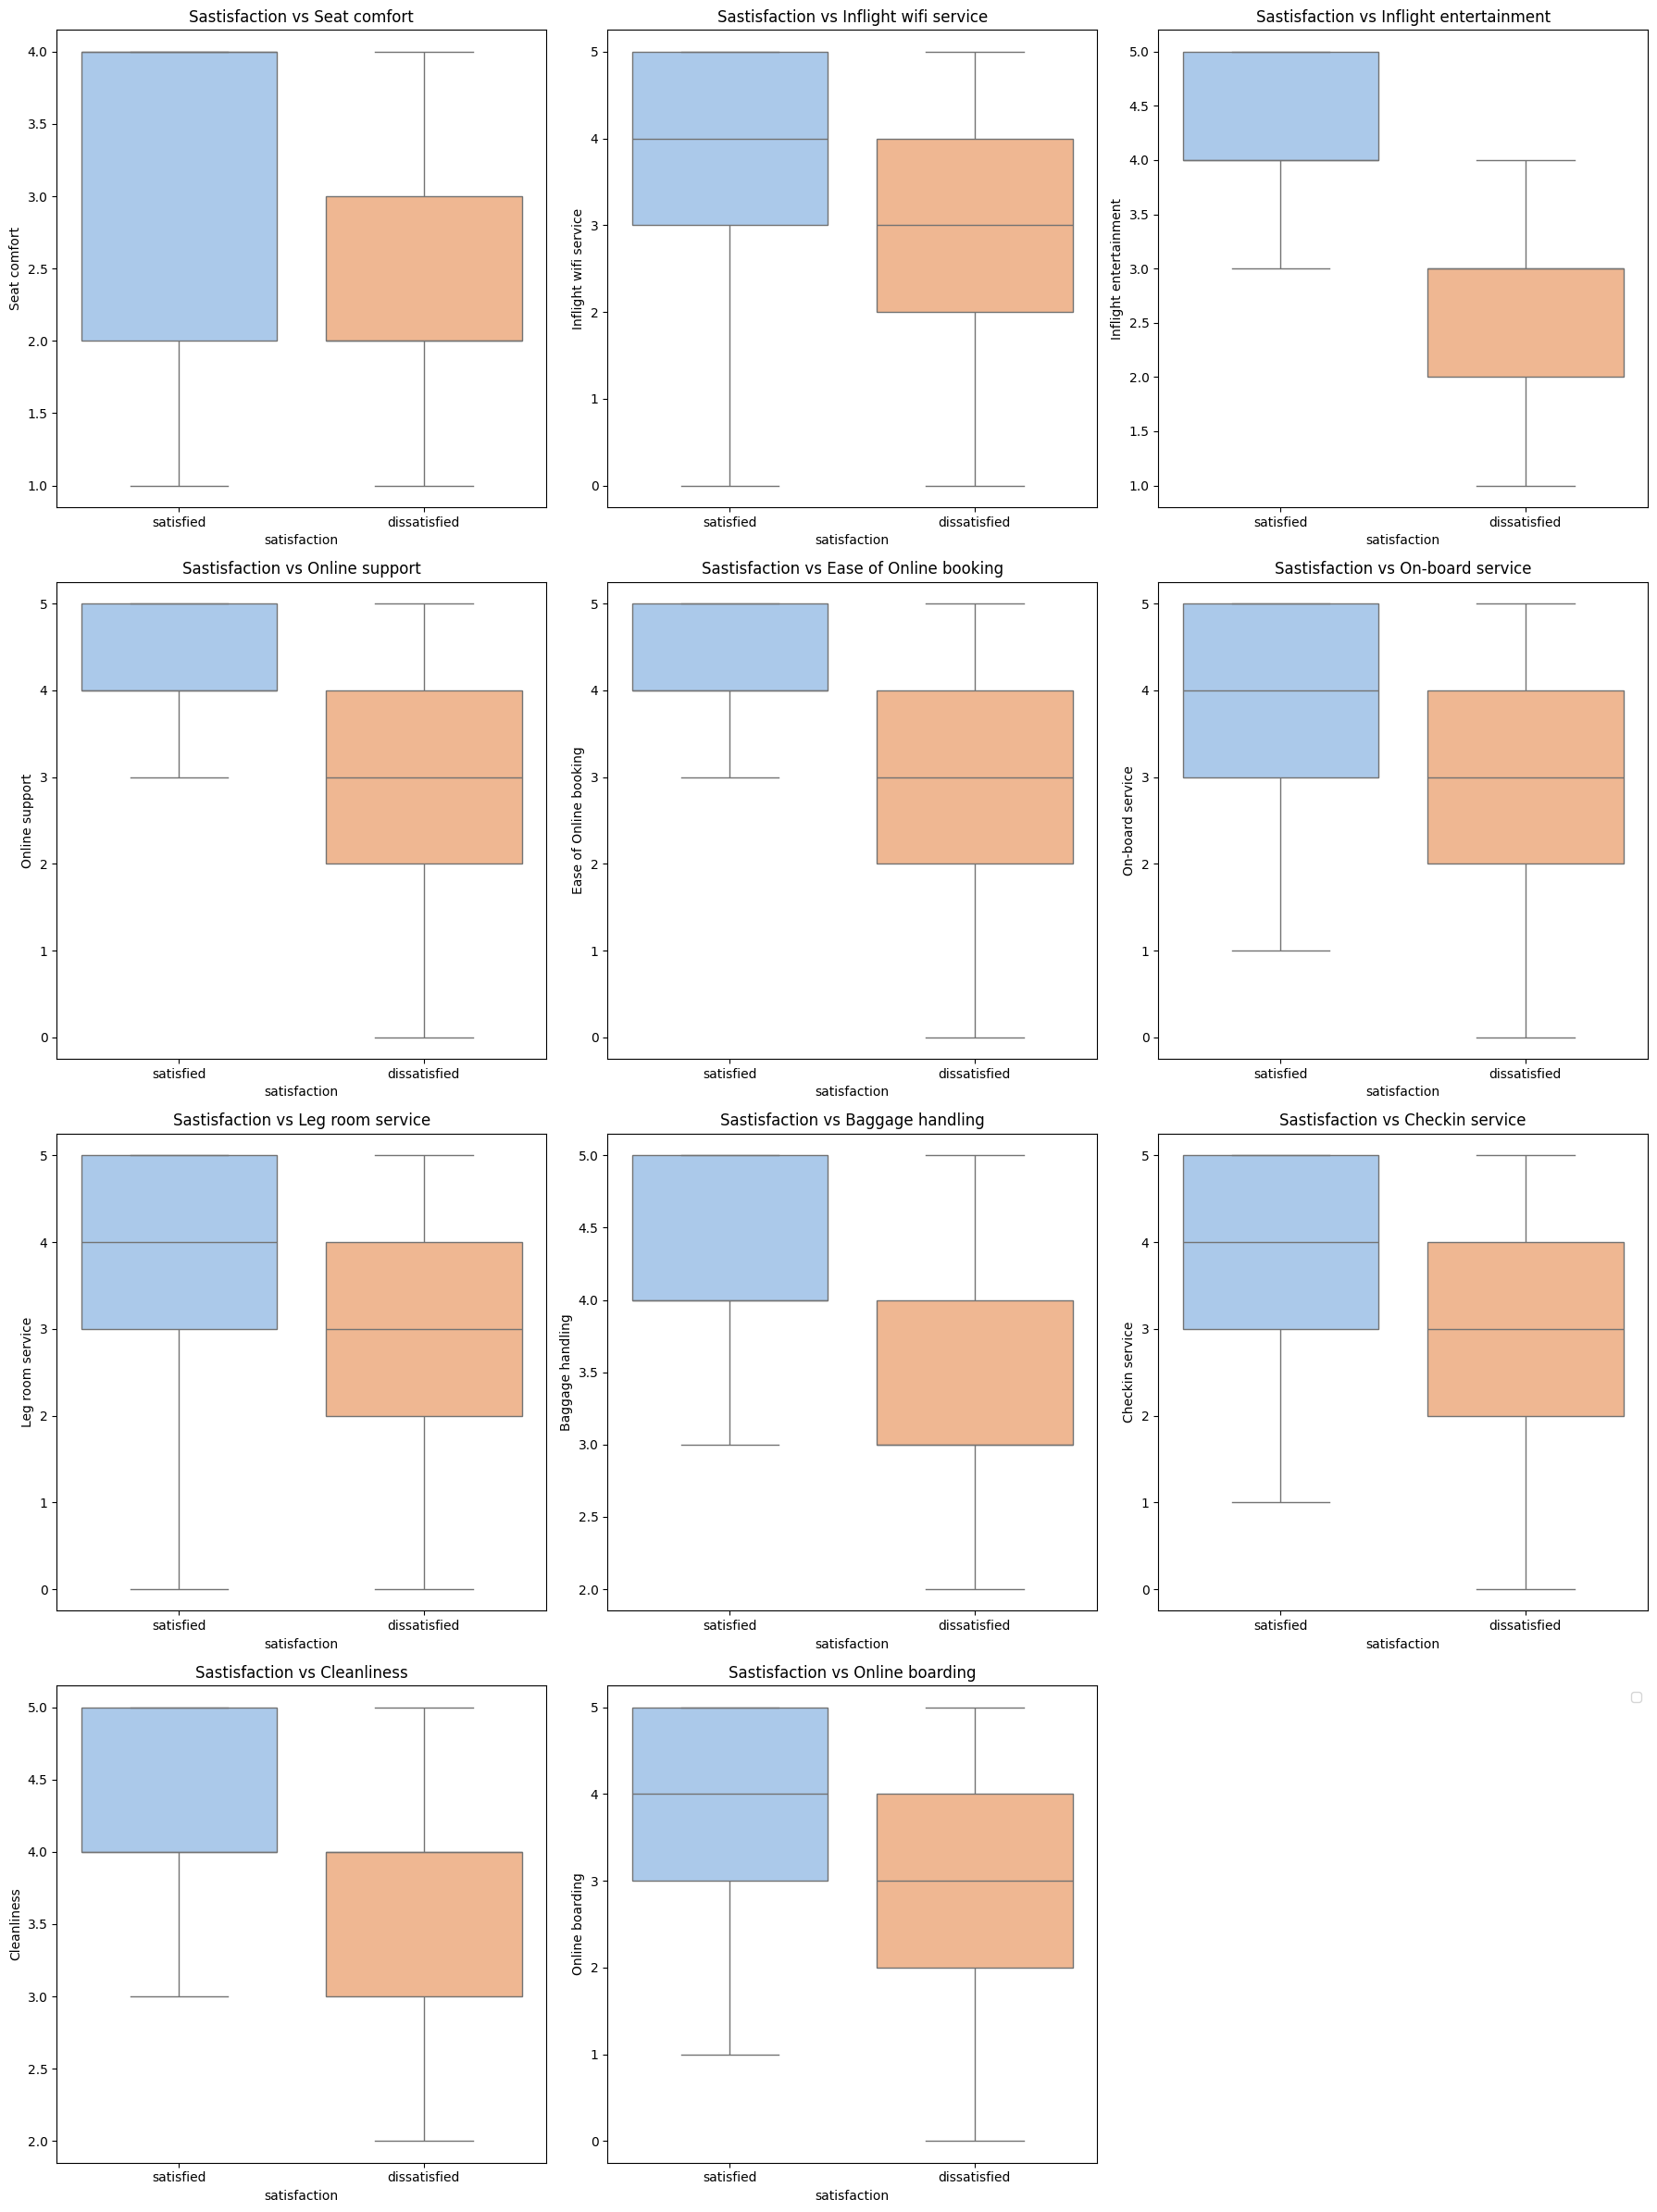

In [80]:
import math

cols = data4.drop( ["satisfaction"], axis=1).columns
fig, ax = plt.subplots(math.ceil(len(cols)/3),3, figsize=(18,24))
a = 0
for i in range(math.ceil(len(cols)/3)):
    for j in range(3):
        if a < len(cols):
            ax[i][j] = sns.boxplot(data=data4, x="satisfaction", y=cols[a], ax=ax[i][j], hue="satisfaction", palette="pastel")
            ax[i][j].set_title(f"Sastisfaction vs {cols[a]}")
            a += 1
        else:
            ax[i][j].axis('off')
plt.tight_layout()    
plt.legend()
plt.show()

> All right we have handled outlier without destroying the pattern of our data, 

> Next is to apply into our classification model which is **Logistic Regression**

# 3. Logistic Regression

In [81]:
data4.head()

,satisfaction,Seat comfort,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
0,satisfied,1,2,4,3,3,3,0,3,5,3,2
1,satisfied,1,0,3,3,3,4,4,4,2,3,2
2,satisfied,1,2,3,3,3,3,3,4,4,4,2
3,satisfied,1,3,4,3,3,1,0,3,4,3,3
4,satisfied,1,4,3,4,3,2,0,3,4,3,5


In [82]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

scale = StandardScaler()
encode = LabelEncoder()
model_lg = LogisticRegression()
encode, model_lg

(LabelEncoder(), LogisticRegression())

In [83]:
feature = data4.drop("satisfaction", axis=1).values
target = data4["satisfaction"].values

X = scale.fit_transform(X=feature)
y = encode.fit_transform(y=target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((97115, 11), (32372, 11), (97115,), (32372,))

In [84]:
model_lg.fit(X=X_train, y=y_train)
predict = model_lg.predict(X=X_test)

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_true=y_test, y_pred=predict))
print(classification_report(y_true=y_test, y_pred=predict))

[[12337  2281]
 [ 1895 15859]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.86     14618
           1       0.87      0.89      0.88     17754

    accuracy                           0.87     32372
   macro avg       0.87      0.87      0.87     32372
weighted avg       0.87      0.87      0.87     32372



In [85]:
model_lg.predict(X=X_test)

array([1, 1, 0, ..., 1, 1, 0])

In [86]:
encode.inverse_transform(y=[0,1])

array(['dissatisfied', 'satisfied'], dtype=object)

# Torch training

In [87]:
import torch
import numpy as np

# Preparing data &&  ** Take care of concat **

tx1 = torch.tensor(data=X_train, dtype=torch.float32)
tx2 = torch.tensor(data=X_test, dtype=torch.float32)

tx_train = torch.concat((torch.ones(size=(tx1.shape[0], 1)), tx1) ,dim = 1)
ty_train = torch.tensor(data=y_train.reshape(-1,1), dtype=torch.float32)

tx_test = torch.concat((torch.ones(size=(tx2.shape[0], 1)), tx2) ,dim = 1)
ty_test = torch.tensor(data=y_test.reshape(-1,1), dtype=torch.float32)


# weight
theta = torch.zeros(size=(tx_test.size(1) , 1), requires_grad=True)

# training

lr = 1
epochs = 500

for epoch in range(epochs):
    z = torch.matmul(tx_train, theta)  # Linear function
    h = torch.sigmoid(z) # sigmoid function of logistic regression
    J = - ty_train*torch.log(h) - (1-ty_train)*torch.log(1-h)   # Loss function
    loss = torch.mean(J) # mean of loss
    
    # if epoch % 10 ==0:
    #     print(f"Epoch : {epoch} , Loss: {loss}")

    theta.grad = None # Initialize weight with zero
    loss.backward() # calculate the partial derivative of loss which store new value in partial
    with torch.no_grad():
        theta -= lr*theta.grad


# Calculate accuracy

prop = torch.sigmoid(torch.matmul(tx_test, theta))
pred = torch.clone(prop)
pred[pred >= 0.5] = 1
pred[pred < 0.5] = 0

accuracy = torch.mean((pred == ty_test).float())
print(f"model accuracy is : {accuracy.item()*100:.2f} %")

model accuracy is : 87.11 %


# Export to pkl

In [88]:
# import streamlit as st
import pickle

In [91]:
with open (file="lg.pkl", mode="wb") as lg_file:
    pickle.dump(obj=model_lg , file=lg_file)


with open (file="scale.pkl", mode="wb") as scale_file:
    pickle.dump(obj=scale , file=scale_file)    


with open (file="encode.pkl", mode="wb") as encode_file:
    pickle.dump(obj=encode , file=encode_file)     

In [93]:
import pickle

# Load the trained logistic regression model
with open("scale.pkl", "rb") as file:
    model = pickle.load(file)

# Check the attributes of the loaded model
print("Attributes of the model:")
print(dir(model))

# Access the coefficients and intercept
if hasattr(model, "coef_"):
    print("Model Coefficients:")
    print(model.coef_)
else:
    print("The model does not have coefficients (coef_).")

if hasattr(model, "intercept_"):
    print("Model Intercept:")
    print(model.intercept_)
else:
    print("The model does not have an intercept (intercept_).")


Attributes of the model:
['__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__slotnames__', '__str__', '__subclasshook__', '__weakref__', '_build_request_for_signature', '_check_feature_names', '_check_n_features', '_doc_link_module', '_doc_link_template', '_doc_link_url_param_generator', '_get_default_requests', '_get_doc_link', '_get_metadata_request', '_get_param_names', '_get_tags', '_more_tags', '_parameter_constraints', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_reset', '_sklearn_auto_wrap_output_keys', '_validate_data', '_validate_params', 'copy', 'fit', 'fit_transform', 'get_feature_names_out', 'get_metadata_routing', 'get_params', 'inverse_transfo

In [90]:
data4.columns

Index(['satisfaction', 'Seat comfort', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding'],
      dtype='object')